In [1]:
import tensorflow as tf
import numpy as np
tf.enable_eager_execution()

In [2]:
tf.random.set_random_seed(1)
np.random.seed(1)

In [3]:
# compatible with tensorflow layers

from aug_attn import *
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

ip = Input(shape=(None, 10))
cnn1 = Conv1D(filters = 10, kernel_size=3, strides=1,padding='same')(ip)
x = augmented_conv1d(cnn1, shape = (32, 10), filters=20, kernel_size=5,
                     strides = 1,
                     padding = 'causal', # if causal convolution is needed
                     depth_k=4, depth_v=4,  
                     num_heads=4, relative_encodings=True)

# depth_k | filters, depth_v | filters,  Nh | depth_k, Nh | filters-depth_v

model = Model(ip, x)
model.summary()

x = tf.ones((1, 32, 10))
print(x.shape)
y = model(x)
print(y.shape)

W0919 14:45:20.346184  6524 deprecation_wrapper.py:119] From T:\TTS_result\DC-TTS_bd_en_300k\speech_out2\attention_aug_cnn\keras-attn_aug_cnn\aug_attn.py:148: The name tf.keras.initializers.RandomNormal is deprecated. Please use tf.compat.v1.keras.initializers.RandomNormal instead.



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 10)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, None, 10)     310         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, None, 12)     132         conv1d[0][0]                     
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 32, 1, 12)    0           conv1d_2[0][0]                   
______________________________________________________________________________________________

In [4]:
tf.TensorShape([1,2,3])

TensorShape([Dimension(1), Dimension(2), Dimension(3)])

Model 1: Conv Layers, (sigmoid)

In [10]:
x1 = np.random.beta(0.5, 1, (1000,100))
y1 = np.zeros((1000,))
print(x1.shape)
print(y1.shape)

x2 = np.random.beta(0.7, 1.25, (1000,100))
y2 = np.ones((1000,))
print(x2.shape)
print(y2.shape)

xz = np.concatenate((x1, x2), axis=0)
yz = np.concatenate((y1, y2), axis=0)
print(xz.shape)
print(yz.shape)

z = list(zip(xz, yz))
np.random.shuffle(z)
xz = np.array([a[0] for a in z])
yz = np.array([a[1] for a in z])

xz = np.reshape(xz, (2000, 100, 1))
yz = np.reshape(yz, (2000,))

print(xz.shape)
print(yz.shape)

(1000, 100)
(1000,)
(1000, 100)
(1000,)
(2000, 100)
(2000,)
(2000, 100, 1)
(2000,)


In [11]:
import matplotlib.pyplot as plt
plt.plot(x1[0])
plt.show()
plt.plot(x2[0])
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [8]:
from aug_attn import *
from tensorflow.keras.layers import Input, Dense, Conv1D, Flatten, Activation, Embedding
from tensorflow.keras.models import Model




ip = Input(shape=(100,1))
cnn1 = Conv1D(filters = 8, kernel_size=3, strides=1,padding='same', activation = 'relu')(ip)

fl = Flatten()(cnn1)
fc = Dense(1, activation='sigmoid')(fl)

basic_cnn = Model(ip, fc)

basic_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

basic_cnn.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 1)]          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 100, 8)            32        
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 801       
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [9]:
cnn_hist = basic_cnn.fit(xz, yz, epochs = 10, batch_size = 16, validation_split=0.5, verbose = 1)

W0919 13:33:11.912007  2412 deprecation.py:323] From c:\users\user\anaconda3\envs\cpu_training\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1000 samples, validate on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 0s 266us/sample - loss: 0.6962 - acc: 0.5050 - val_loss: 0.7007 - val_acc: 0.5120
Epoch 2/10
1000/1000 [==============================] - 0s 94us/sample - loss: 0.6861 - acc: 0.5480 - val_loss: 0.6900 - val_acc: 0.5490
Epoch 3/10
1000/1000 [==============================] - 0s 94us/sample - loss: 0.6722 - acc: 0.6030 - val_loss: 0.6851 - val_acc: 0.5790
Epoch 4/10
1000/1000 [==============================] - 0s 94us/sample - loss: 0.6592 - acc: 0.6650 - val_loss: 0.6771 - val_acc: 0.5720
Epoch 5/10
1000/1000 [==============================] - 0s 94us/sample - loss: 0.6476 - acc: 0.6790 - val_loss: 0.6758 - val_acc: 0.5810
Epoch 6/10
1000/1000 [==============================] - 0s 94us/sample - loss: 0.6329 - acc: 0.7070 - val_loss: 0.6620 - val_acc: 0.6190
Epoch 7/10
1000/1000 [==============================] - ETA: 0s - loss: 0.6213 - acc: 0.703 - 0s 94us/sample - loss: 0.6195 - acc

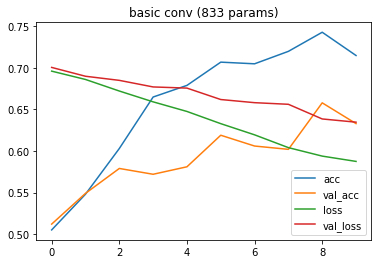

In [10]:
import matplotlib.pyplot as plt
plt.plot(cnn_hist.history['acc'])
plt.plot(cnn_hist.history['val_acc'])
plt.plot(cnn_hist.history['loss'])
plt.plot(cnn_hist.history['val_loss'])
plt.legend(['acc', 'val_acc', 'loss', 'val_loss'])
plt.title('basic conv (833 params)')
plt.show()

In [11]:
basic_cnn.evaluate(xz, yz)

2000/2000 [==============================] - 0s 31us/sample - loss: 0.6025 - acc: 0.7000


[0.6024939422607422, 0.7]

In [12]:
ip = Input(shape=(100,1))

x = augmented_conv1d(ip, shape = (100, 1), filters=6, kernel_size=3,
                     strides = 1,
                     padding = 'same', # if causal convolution is needed
                     depth_k=2, depth_v=2,  
                     num_heads=2, relative_encodings=True)
x = Activation('relu')(x)
fl = Flatten()(x)
fc = Dense(1, activation='sigmoid')(fl)

aac_cnn = Model(ip, fc)

aac_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

aac_cnn.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 100, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 100, 6)       12          input_3[0][0]                    
__________________________________________________________________________________________________
reshape_6 (Reshape)             (None, 100, 1, 6)    0           conv1d_6[0][0]                   
__________________________________________________________________________________________________
attention_augmentation2d_1 (Att (None, None, None, N 200         reshape_6[0][0]                  
____________________________________________________________________________________________

In [13]:
aac_hist = aac_cnn.fit(xz, yz, epochs = 10, batch_size = 16, validation_split = 0.5, verbose = 0)

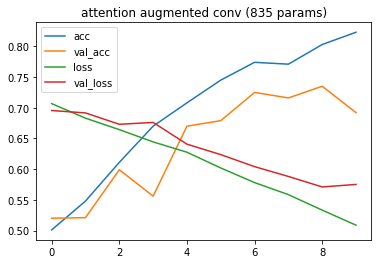

In [14]:
import matplotlib.pyplot as plt
plt.plot(aac_hist.history['acc'])
plt.plot(aac_hist.history['val_acc'])
plt.plot(aac_hist.history['loss'])
plt.plot(aac_hist.history['val_loss'])
plt.title('attention augmented conv (835 params)')
plt.legend(['acc', 'val_acc', 'loss', 'val_loss'])
plt.show()

In [15]:
aac_cnn.evaluate(xz, yz)

2000/2000 [==============================] - 1s 312us/sample - loss: 0.5434 - acc: 0.7425


[0.5433681025505066, 0.7425]

In [17]:
from aug_attn import *
from keras.layers import Input
from keras.models import Model

ip = Input(shape=(32, 32, 10))
cnn1 = Conv2D(filters = 10, kernel_size=3, strides=1,padding='same')(ip)
x = augmented_conv2d(cnn1, filters=20, kernel_size=5, # shape parameter is not needed
                     strides = 1,
                     depth_k=4, depth_v=4,  # padding is by default, same
                     num_heads=4, relative_encodings=True)

# depth_k | filters, depth_v | filters,  Nh | depth_k, Nh | filters-depth_v

model = Model(ip, x)
model.summary()

x = tf.ones((1, 32, 32, 10))
print(x.shape)
y = model(x)
print(y.shape)

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, 32, 32, 10)   0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 32, 32, 10)   910         input_16[0][0]                   
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 32, 32, 12)   132         conv2d_11[0][0]                  
__________________________________________________________________________________________________
attention_augmentation2d_14 (At (None, 32, 32, 4)    126         conv2d_13[0][0]                  
___________________________________________________________________________________________

In [8]:
# extra, delete later
from modules import *
from tensorflow.keras.layers import Activation, Flatten, Dense
ip = Input(shape=(100,1))

x = augmented_conv1d(ip, shape = (100, 1), filters=6, kernel_size=3,
                     strides = 1,
                     padding = 'same', # if causal convolution is needed
                     depth_k=2, depth_v=2,  
                     num_heads=2, relative_encodings=True)

x = dha(x, training = 1)
x = Activation('relu')(x)
fl = Flatten()(x)
fc = Dense(1, activation='sigmoid')(fl)

aac_cnn = Model(ip, fc)

aac_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

aac_cnn.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 100, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_32 (Conv1D)              (None, 100, 6)       12          input_5[0][0]                    
__________________________________________________________________________________________________
reshape_21 (Reshape)            (None, 100, 1, 6)    0           conv1d_32[0][0]                  
__________________________________________________________________________________________________
attention_augmentation2d_4 (Att (None, None, None, N 200         reshape_21[0][0]                 
____________________________________________________________________________________________

In [14]:
aac_hist = aac_cnn.fit(xz, yz, epochs = 50, batch_size = 16, validation_split = 0.5, verbose = 0)

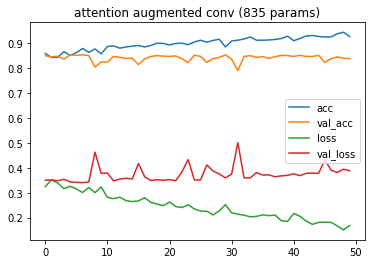

In [15]:
import matplotlib.pyplot as plt
plt.plot(aac_hist.history['acc'])
plt.plot(aac_hist.history['val_acc'])
plt.plot(aac_hist.history['loss'])
plt.plot(aac_hist.history['val_loss'])
plt.title('attention augmented conv (835 params)')
plt.legend(['acc', 'val_acc', 'loss', 'val_loss'])
plt.show()